<a href="https://colab.research.google.com/github/ShaleBale/SeaIce/blob/main/Test_Rotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 33.0 MB/s eta 0:00:00


In [2]:
import rasterio

In [3]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm, trange
import cv2

from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label, binary_dilation, binary_erosion, reconstruction
from skimage.measure import regionprops, regionprops_table
from skimage import measure
from skimage.segmentation import watershed

from shapely.geometry import Polygon, LineString
from shapely.affinity import scale
from descartes import PolygonPatch

import scipy.ndimage as ndi
import scipy.interpolate

import tensorflow as tf

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from tensorflow.keras.layers import Lambda, RepeatVector, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate, add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

from glob import glob

In [12]:
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
img_path = '/content/gdrive/MyDrive/SeaIce/Exports/Final_p10_168/c168_SHIFT_p10_Clip.tif'
mask_path = '/content/gdrive/MyDrive/SeaIce/SAM/Test_Final_Ras.tif'

In [8]:
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)



In [32]:
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

In [33]:
# convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binarize image
threshold, binarized_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find the largest contour
contours, hierarchy = cv2.findContours(binarized_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key = cv2.contourArea)

# get size of the rotated rectangle
center, size, angle = cv2.minAreaRect(c)

# get size of the image
h, w, *_ = img.shape

# create a rotation matrix and rotate the image
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))

# crop the image
pad_x = int((w - size[0]) / 2)
pad_y = int((h - size[1]) / 2)

cropped_img = rotated_img[pad_y : pad_y + int(size[1]), pad_x : pad_x + int(size[0]), :]

In [34]:
cropped_img.shape

(1023, 758, 4)

In [35]:
img.shape

(1170, 1218, 4)

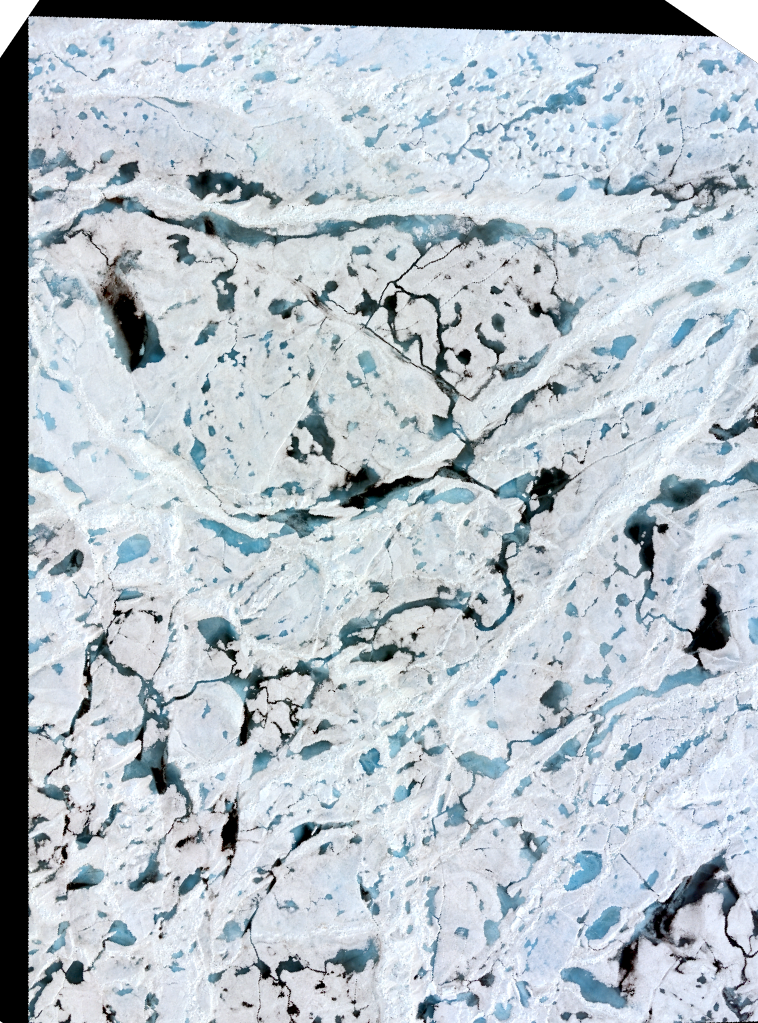

In [36]:
cv2_imshow(cropped_img)

In [ ]:
## apply the same rotation and crop to the mask image. To do this, I'm thinking the mask would have to be the same size as the oiginal image first.

In [37]:
mask_resize = cv2.resize(mask, None, fx=img.shape[0]/mask.shape[0], fy=img.shape[1]/mask.shape[1], interpolation = cv2.INTER_NEAREST)

In [38]:
mask_resize = cv2.resize(mask, (1218, 1170), interpolation=cv2.INTER_NEAREST)

In [39]:
mask.shape

(1187, 1253)

In [40]:
mask_resize.shape

(1170, 1218)

In [41]:
## crop the mask 

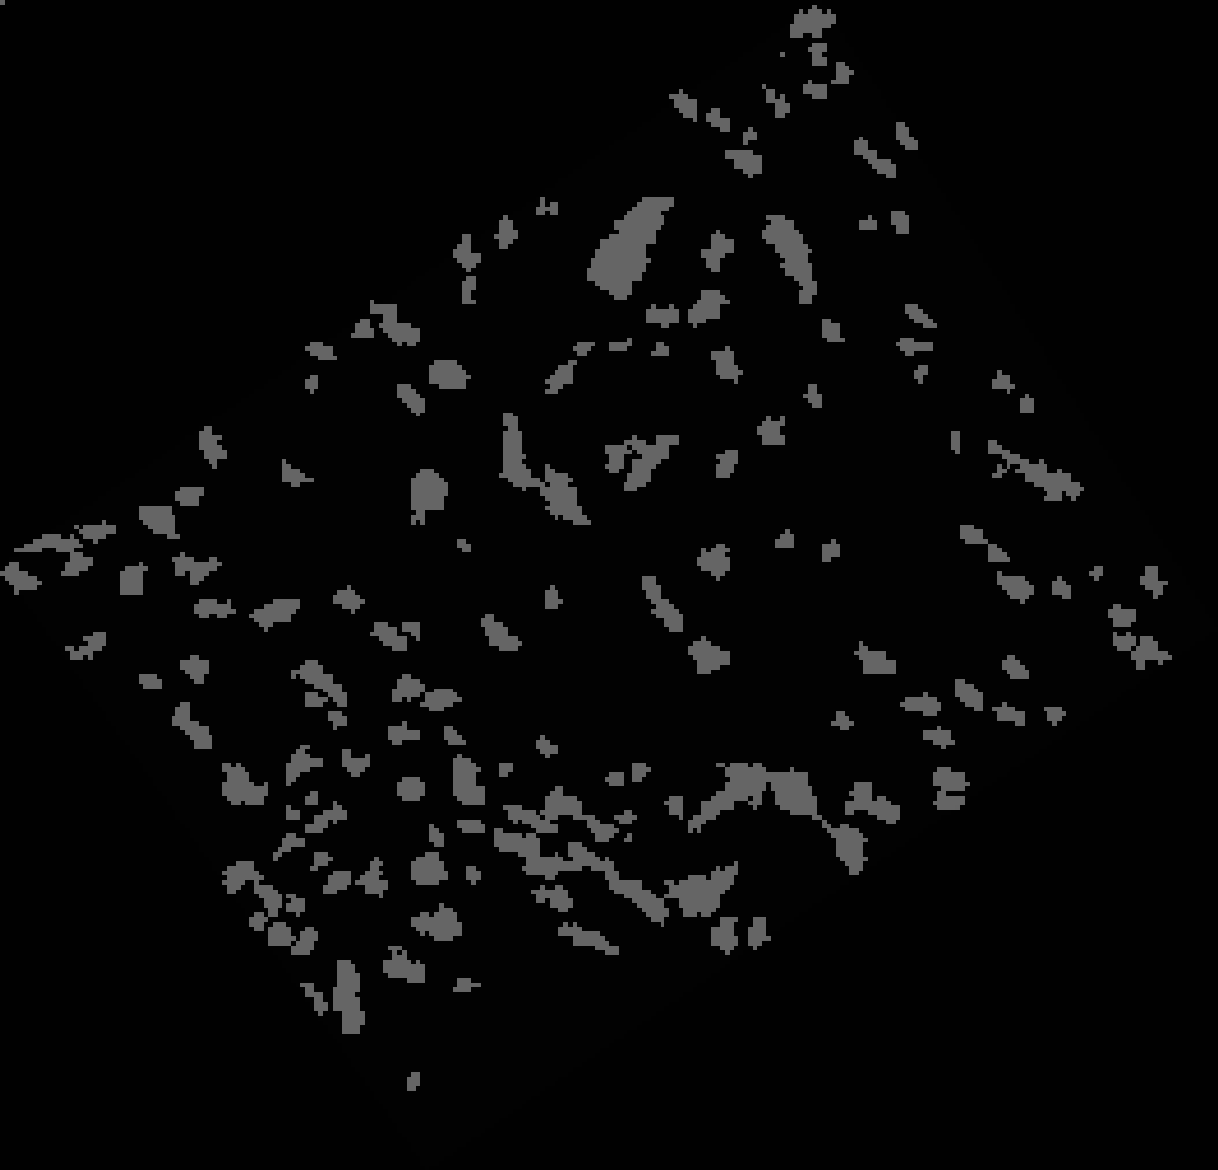

In [42]:
cv2_imshow(mask_resize)

In [46]:
h, w, = mask_resize.shape

In [51]:
mask_resize.shape

(1170, 1218)

In [53]:
gray_mask = cv2.cvtColor(mask_resize, cv2.COLOR_BGR2GRAY)

error: ignored

In [52]:
rotated_mask = cv2.warpAffine(mask_resize, M, (w, h))

# # crop the second image
# cropped_img2 = rotated_mask[pad_y : pad_y + int(size[1]), pad_x : pad_x + int(size[0]), :]

error: ignored

In [50]:
M.shape

(2, 3)